<html>
    <body>
        <h1 style="color: DodgerBlue">Documantion and Tasks</h1>
    </body>
</html>

<h3 style="color: Teal;">Brought to you by: Sepehr Movasat, Matin Kasra, Khatami Brothers</h3>

<html>
    <body>
        <h4 style="color: Tomato;">Problem:<span><p style="color: LightBlue; font-size: 20px">Estimate the likelihood of a heart attack for a human, based on the given data (from user)</p></span></h4>
    </body>
</html>

<html>
    <body>
        <h3 style="color: LightGreen">1- Understanding the data: <span style="color: PaleTurquoise; font-size: 22.5">2 Days</span></h3>
    </body>
</html>

If you want to write an algorithm you must think about it and understand it first, and in ML that's the same

<html>
    <body>
        <h5 style="color: Violet;">1.1- Understanding every column</h5>
    </body>
</html>

<html>
    <body>
        <p>
            <span style="color: SkyBlue">age:</span> The age of the patient.
            <br>
            <br>
            <span style="color: SkyBlue">sex:</span> Gender of the patient (0 for female, 1 for male).
            <br>
            <br>
            <span style="color: SkyBlue">cp:</span> Chest pain type (0: no pain, 1: typical angina, 2: atypical angina, 3: non-anginal pain).
            <br>
            <br>
            <span style="color: SkyBlue">trtbps:</span> Resting blood pressure (mm Hg) of the patient.
            <br>
            <br>
            <span style="color: SkyBlue">chol:</span> Serum cholesterol level (mg/dl) of the patient.
            <br>
            <br>
            <span style="color: SkyBlue">fbs:</span> Fasting blood sugar > 120 mg/dl (1 for true, 0 for false).
            <br>
            <br>
            <span style="color: SkyBlue">restecg:</span> Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: probable left ventricular hypertrophy).
            <br>
            <br>
            <span style="color: SkyBlue">thalachh:</span> Maximum heart rate achieved during exercise. 
            <br>
            <br>
            <span style="color: SkyBlue">exng:</span> Exercise induced angina (1 for yes, 0 for no).
            <br>
            <br>
            <span style="color: SkyBlue">oldpeak:</span> ST depression induced by exercise relative to rest.
            <br>
            <br>
            <span style="color: SkyBlue">slp:</span> Slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping).
            <br>
            <br>
            <span style="color: SkyBlue">caa:</span> Number of major vessels (0-3) colored by fluoroscopy.
            <br>
            <br>
            <span style="color: SkyBlue">thall:</span> Thallium stress test result (1: normal, 2: fixed defect, 3: reversible defect).
            <br>
            <br>
            <span style="color: SkyBlue">output:</span> The target variable (1 for heart attack present, 0 for no heart attack).
        </p>
    </body>
</html>

<html>
    <body>
        <h5 style="color: Violet;">1.2- Visualizing correlation with heatmap</h5>
    </body>
</html>

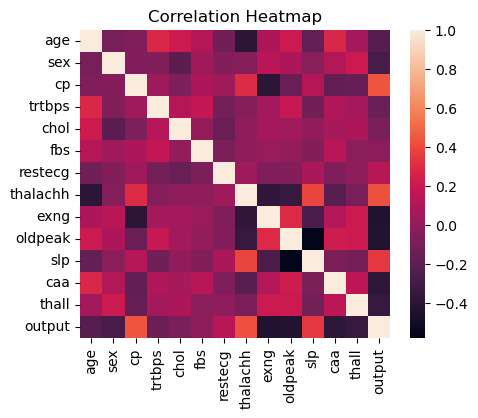

In [6]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
import colorama as cm
from pynput import keyboard
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Who likes non-sense warnings?
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("Data/heart.csv")
corr = df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(5, 4))
sb.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,)
plt.title("Correlation Heatmap")
plt.show()

<html>
    <body>
        <h5 style="color: Violet;">1.3- Implementing box plot</h5>
    </body>
</html>

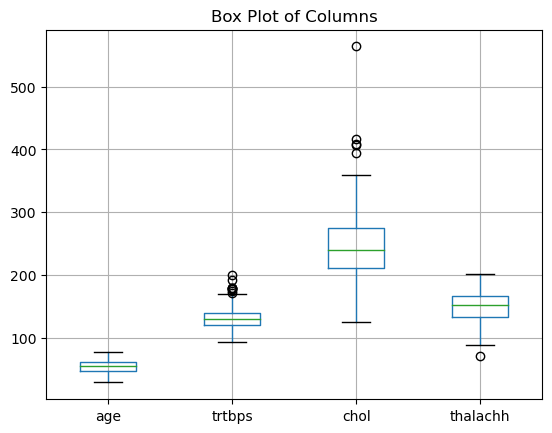

In [7]:
# Visualizing box plot for some of the columns 
cols = ['age', 'trtbps', 'chol', 'thalachh']
df[cols].boxplot()
plt.title('Box Plot of Columns')
plt.show()

<html>
    <body>
        <h3 style="color: LightGreen">2- Data cleaning: <span style="color: PaleTurquoise;">1 Day</span></h3>
    </body>
</html>

As there is no null data, our cleaning part is short and kind of easy!
Just need to remove the out-of-range values.

<html>
    <body>
        <h5 style="color: Violet;">2.1- Remvoing out-of-range values</h5>
    </body>
</html>

In [8]:
# Columns with out-of-range values
outlier_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
print("Data Frame Shape 'BEFORE' Cleaning", df.shape)

# Looping through the columns and remove outliers using IQR method
for col in outlier_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    cleaned_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Data Frame Shape 'AFTER' Cleaning", cleaned_df.shape)

Data Frame Shape 'BEFORE' Cleaning (303, 14)
Data Frame Shape 'AFTER' Cleaning (298, 14)


<html>
    <body>
        <h5 style="color: Violet;">2.2 After cleaning vs. Before cleaning (accuracy)</h5>
    </body>
</html>

We need to implement a logistic regression to determine which one is more accurate

We check their accuracy because we cleaned out-of-range values that might have been correct

**As linear regression is not accurate for binary outcomes, we use logistic regression.**

In [9]:
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
target = 'output'

# Splitting data into features and target
X = df[features]
y = df[target]
# ------------------------
X2 = cleaned_df[features]
y2 = cleaned_df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ----------------------------------------------------------------------------------------
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)
# ---------------------------
model.fit(X_train2, y_train2)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred2 = model.predict(X_test2)

# Calculate accuracy
accuracy_before_cleaning = accuracy_score(y_test, y_pred)
# -------------------------------------------------------
accuracy_after_cleaning = accuracy_score(y_test2, y_pred2)

print(f'Accuracy BEFORE Cleaning: {accuracy_before_cleaning}')
print(f'Accuracy AFTER Cleaning: {accuracy_after_cleaning}')

Accuracy BEFORE Cleaning: 0.8688524590163934
Accuracy AFTER Cleaning: 0.8666666666666667


<html>
    <body>
        <h3 style="color: LightGreen">3- Modeling: <span style="color: PaleTurquoise; font-size: 22.5pxpx">4 Days</span></h3>
    </body>
</html>

HERE IT IS. The important most and the hardest part of our project.

As the accuracy before data cleaning was more, we use the original data frame.

In [10]:
# Get user input for prediction (In the "Final touches" part this is changed to more basic)
user_input = []
for feature in features:
    value = float(input(f"Enter {feature}: "))
    user_input.append(value)
    
user_input = np.array(user_input).reshape(1, -1)

# Make a prediction for the user input
prediction = model.predict(user_input)

if prediction[0] == 1:
    print("You are likley to get a heart attack!")
    print("OUR PROGRAM IS IN BETA STAGE AND IT'S ACCURACY IS ABOUT 85%")

elif prediction[0] == 0:
    print("You are not likley to get a heart attack!")
    print("OUR PROGRAM IS IN BETA STAGE AND IT'S ACCURACY IS ABOUT 85%")

You are not likley to get a heart attack!
OUR PROGRAM IS IN BETA STAGE AND IT'S ACCURACY IS ABOUT 85%


<html>
    <body>
        <h3 style="color: LightGreen">4- Final touches: <span style="color: PaleTurquoise; font-size: 22.5pxpx">5 Days</span></h3>
    </body>
</html>

<html>
    <body>
        <h5 style="color: Violet;">4.1 Getting input from user (in a better way) + Error handling</h5>
    </body>
</html>

In [11]:
class RealityWarpErrors(Exception):
    """Catches dumb deliberate errors""" # <-----
    pass

# A sample of how we get the input from the user
age = int(input("Input your age: "))
match age:
    case _ if age >= 120: # Yeah the "if" itself might be easier, but I'm used to this match-case syntax
        raise RealityWarpErrors("Hold up! Age above 120? Unless you're a time traveler, let's keep it reasonable.")
    case _ if age < 0:
        raise RealityWarpErrors("Whoa, slow down there! Age can't be negative. Try a positive number, like how old you'll be someday.")

<html>
    <body>
        <h5 style="color: Violet;">4.2 UI (User Interface)</h5>
    </body>
</html>

<html>
    <body>
        <h5 style="color: DodgerBlue; font-size: 21px">4.21 Color and styles</h5>
    </body>
</html>

In [12]:
def Great_Style():
        print(cm.Fore.CYAN +"[" + cm.Fore.GREEN + "+" + cm.Fore.CYAN + "] " + cm.Fore.RESET, end="")

# Example use
Great_Style()
print(cm.Fore.RED + "This ain't python, this is magic!")

[+] This ain't python, this is magic!


<html>
    <body>
        <h5 style="color: DodgerBlue; font-size: 21px">4.22 Clear the screen</h5>
    </body>
</html>

In [13]:
def cls():
    if os.name == 'nt': # Wanna be cross-platform!
        _ = os.system('cls')
    else:
        _ = os.system('clear')

# Example use
print("A dirty screen:")
print("""Lorem ipsum dolor sit amet, consectetur adipiscing elit. Fusce vel purus ac odio blandit tristique. Curabitur at dapibus sapien. Vestibulum sem diam, consequat et purus a, mollis hendrerit quam. Phasellus eu purus et nibh posuere suscipit et sit amet erat. Pellentesque lacus justo, venenatis ac dictum id, tempor nec nisi. Etiam laoreet aliquam tortor eu convallis. Suspendisse facilisis tempor justo eu convallis. Sed et nulla nisi. Ut congue orci et bibendum pulvinar. In at dui tristique, pulvinar tellus vel, eleifend tortor.
Sed nec odio quis urna mollis molestie. Donec interdum elementum lacus, sodales mollis libero lacinia sit amet. Donec tempor, massa non feugiat ornare, arcu lacus iaculis lacus, nec condimentum est ipsum eget ligula. Nunc purus neque, volutpat a magna quis, tempus ultricies metus. Donec purus odio, finibus sit amet accumsan in, euismod ut nisi. Nullam est velit, suscipit in ipsum et, auctor pellentesque nibh. Sed ornare mi nec ornare egestas. Donec malesuada sem at ornare blandit. Maecenas ultrices bibendum augue, a facilisis sem mollis vel. Vestibulum ac dolor commodo, tincidunt leo eu, mattis elit.""")
cls()
print("----------------------------------------------------------------")
print(cm.Fore.RED + "No more lorem ipsum! HEY JUPITER, WHY THE HELL YOU DON'T CLEAN IT :||")
print(cm.Fore.RED + "In python it's cleaned, no worries!")

A dirty screen:
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Fusce vel purus ac odio blandit tristique. Curabitur at dapibus sapien. Vestibulum sem diam, consequat et purus a, mollis hendrerit quam. Phasellus eu purus et nibh posuere suscipit et sit amet erat. Pellentesque lacus justo, venenatis ac dictum id, tempor nec nisi. Etiam laoreet aliquam tortor eu convallis. Suspendisse facilisis tempor justo eu convallis. Sed et nulla nisi. Ut congue orci et bibendum pulvinar. In at dui tristique, pulvinar tellus vel, eleifend tortor.
Sed nec odio quis urna mollis molestie. Donec interdum elementum lacus, sodales mollis libero lacinia sit amet. Donec tempor, massa non feugiat ornare, arcu lacus iaculis lacus, nec condimentum est ipsum eget ligula. Nunc purus neque, volutpat a magna quis, tempus ultricies metus. Donec purus odio, finibus sit amet accumsan in, euismod ut nisi. Nullam est velit, suscipit in ipsum et, auctor pellentesque nibh. Sed ornare mi nec ornare egestas. Donec 

<html>
    <body>
        <h5 style="color: DodgerBlue; font-size: 21px">4.23 ASCII Art</h5>
    </body>
</html>

<html>
    <img src="Data/ASCII Art.png" />
    <img src="Data/Sepehr.png" />
</html>

<html>
    <body>
        <h5 style="color: DodgerBlue; font-size: 21px">4.24 Progress bar</h5>
    </body>
</html>

In [14]:
class ProgressBar: # <---- Needed object oriented programming
    """A nice cool progress bar""" # <----
    def __init__(self, total_steps, description='Progress'):
        self.total_steps = total_steps
        self.description = description
        self.step = 0
        self.bar_width = 20

    def advance_progress(self):
        if self.step < self.total_steps:
            self.step += 1
            print(cm.Fore.BLUE + (f"<-----------{self.description}----------->"))
            self._update_progress_bar()
            
    def _update_progress_bar(self): # Math + Some brain cells!
        percent_complete = (self.step / self.total_steps) * 100
        completed_bar = '=' * int(self.bar_width * (self.step / self.total_steps))
        remaining_bar = ' ' * (self.bar_width - len(completed_bar))
        full_bar = cm.Fore.GREEN + completed_bar + cm.Fore.RESET + remaining_bar
        print(f'\r{cm.Fore.MAGENTA + self.description}: {cm.Fore.RED + "[" + cm.Fore.RESET}{full_bar}{cm.Fore.RED + "]"} {cm.Fore.CYAN + str(int(percent_complete)) + "%" + cm.Fore.RESET}', flush=True)

# Here I don't use cls to show you the progress
bar = ProgressBar(11, "Example")
for i in range(11):
    bar.advance_progress()

<-----------Example----------->
Example: [=                   ] 9%
<-----------Example----------->
Example: [===                 ] 18%
<-----------Example----------->
Example: [=====               ] 27%
<-----------Example----------->
Example: [=======             ] 36%
<-----------Example----------->
Example: [=========           ] 45%
<-----------Example----------->
Example: [==========          ] 54%
<-----------Example----------->
Example: [============        ] 63%
<-----------Example----------->
Example: [==============      ] 72%
<-----------Example----------->
Example: [================    ] 81%
<-----------Example----------->
Example: [==================  ] 90%
<-----------Example----------->
Example: [====================] 100%


<html>
    <body>
        <h5 style="color: Violet;">4.3 Requirements.txt & Import Error</h5>
    </body>
</html>

<html>
    <body>
        <h5 style="color: DodgerBlue; font-size: 21px">4.31 Generate requirements.txt</h5>
    </body>
</html>

In [18]:
os.system("python3 -m  pipreqs.pipreqs .")

INFO: Successfully saved requirements file in ./requirements.txt


0

<html>
    <body>
        <h5 style="color: DodgerBlue; font-size: 21px">4.32 Install from requirements.txt</h5>
    </body>
</html>

In [19]:
# BTW I had them installed
os.system("pip install -r requirements.txt")

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/argparse-1.4.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/kyubi-0.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


0

<html>
    <body>
        <h5 style="color: DodgerBlue; font-size: 21px">4.33 Handle import error</h5>
    </body>
</html>

In [16]:
try:
    import myfunction
except ImportError:
    print("Oh, couldn't import myfunction! Myabe it's not installed")
    # And the installation code here

Oh, couldn't import myfunction! Myabe it's not installed
